<div class="alert alert-block alert-info " style=' color:MidnightBlue; background-color: AliceBlue ;  border-radius: 30px; border-color: black; '>
<hr><h1 > Examen d'intelligence artificielle II - MIN 5A -  <img  src="   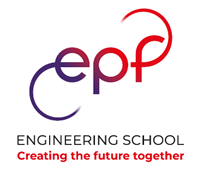" align="right"  width="100" > 
 <br>
     <br>
    <br>
 <hr>
</div>


*Entrez votre Nom, Prénom et Majeure ici*

<div class="alert alert-block alert-info" style='color:midnightblue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '> 
    <hr><h2>1.	Partie classification </h2><hr>    
    <ol>
Vous allez utiliser pour résoudre un problème de classification la base de données
champignons.csv. Cette base de données comprend des entrées correspondantes à des
caractéristiques de champignons (surface, couleur, etc). La sortie correspond à la comestibilité des
champignons ('p' pour poisonous càd toxique et 'e' pour edible càd commestible).

 <br>
    </ol>
</div>

<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
1.1 Importez les données en utilisant la bibliothèque pandas et la fonction read_csv().<br><br>
1.2 Encodez les données en données chiffres plutôt que des lettres en exécutant les lignes de
code suivantes qui permettent de le faire :
<CODE>
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in raw_data.columns:
    raw_data[col] = labelencoder.fit_transform(raw_data[col])
raw_data.head()
</CODE>
<br>
1.3 La fonction read_csv(), renvoie un DataFrame de plusieurs colonnes. Séparez les deux
variables X et Y en utilisant l’instruction iloc[] de telle sorte que les sorties Y correspondent
à la première colonne càd nom_bd.iloc[:,0] et les autres colonnes restantes correspondent aux
observations X.<br><br>
1.4 Utilisez l’instruction train_test_split pour diviser la base de données X et Y en base
d’apprentissage X_train et Y_train et en base de test X_test et Y_test avec un ratio de taille
de test =0.33 et le paramètre shuffle à True.<br><br>
</div>

In [48]:
#Insérez votre code ici
#Question 1.1
import pandas as pd
path="champignons.csv"
raw_data = pd.read_csv(path)

#Queston 1.2
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in raw_data.columns:
    raw_data[col] = labelencoder.fit_transform(raw_data[col])
raw_data.head()



,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [49]:
#Question 1.3

Y = raw_data.iloc[:,0]
X= raw_data.iloc[:,1:]

print(Y.shape, X.shape)

#Question 1.4
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.33,shuffle=True)


(8124,) (8124, 22)



<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    <B> Méthode 1 </B><br>
    <br>
1.5 Appliquez un classifieur en utilisant SVC avec comme paramètre kernel='linear'.<br><br>
1.6 Entrainez le classifieur sur les données d’apprentissage.<br><br>
1.7 Réalisez la prédiction sur les données de test.<br><br>
1.8 Affichez la matrice de confusion obtenue sur les données de test. <br>
    </div>

In [50]:
#Question 1.5
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear')

#Question1.6
clf.fit(X_train, y_train)
#Question 1.7
y_pred = clf.predict(X_test)

#Question 1.8
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))




[[1344   58]
 [  58 1221]]


### Courte fonction pour afficher la matrice de confusion proprement

In [51]:
def confusion_matrix_ascii(confusion_matrix):
  # Création de la table ASCII
  print('+------------+------------+------------+')

  # En-tête de la table
  print('|            | Positif    | Négatif    |')
  print('+------------+------------+------------+')

  # Lignes de la table
  for i, row in enumerate(confusion_matrix):
    if i == 0:
      print('| Réel positif |', end='')
    else:
      print('| Réel négatif |', end='')
    for cell in row:
      print(f' {cell:10d} |', end='')
    print()
    print('+------------+------------+------------+')

confusion_matrix_ascii(confusion_matrix(y_test, y_pred))


+------------+------------+------------+
|            | Positif    | Négatif    |
+------------+------------+------------+
| Réel positif |       1344 |         58 |
+------------+------------+------------+
| Réel négatif |         58 |       1221 |
+------------+------------+------------+



<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    <B> Méthode 2 </B><br>
    <br>
1.9 Implémentez un classifieur via SGDClassifier en prenant comme paramètre random_state=42.<br><br>
1.10 Entrainez le classifieur sur les données d’apprentissage.<br><br>
1.11 Réalisez la prédiction sur les données de test.<br><br>
1.12 Affichez la matrice de confusion obtenue sur les données de test.<br>
    </div>

In [52]:
#Question 1.9, 1.10, 1.11, 1.12

from  sklearn.linear_model  import  SGDClassifier

sg_clf = SGDClassifier(random_state=42)
sg_clf.fit(X_train, y_train)
y_pred_sg = sg_clf.predict(X_test)

confusion_matrix_ascii(confusion_matrix(y_test, y_pred_sg))

# On observe beaoucp de réels positifs qui sont considérés comme négaitfs, le modèle n'est pas adapté 

+------------+------------+------------+
|            | Positif    | Négatif    |
+------------+------------+------------+
| Réel positif |       1338 |         64 |
+------------+------------+------------+
| Réel négatif |         75 |       1204 |
+------------+------------+------------+



<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    <B> Méthode 3 </B><br>
    <br>
1.13 Créer un classifieur implémenté via LinearSVC en utilisant comme paramètres : C=1,
dual=False, random_state=42, et un nombre d’itérations max = 1200000.<br><br>
1.14 Entrainez le classifieur sur les données d’apprentissage.<br><br>
1.15 Réalisez la prédiction sur les données de test.<br><br>
1.16 Affichez la matrice de confusion obtenue sur les données de test.<br>
    </div>

In [53]:
#Insérez votre code ici

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
sgd_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1,  dual=False, random_state=42,max_iter=1200000)),])

sgd_clf.fit(X_train,y_train)

y_pred_sgd=sgd_clf.predict(X_test)

confusion_matrix_ascii(confusion_matrix(y_test, y_pred_sgd))


+------------+------------+------------+
|            | Positif    | Négatif    |
+------------+------------+------------+
| Réel positif |       1326 |         76 |
+------------+------------+------------+
| Réel négatif |         63 |       1216 |
+------------+------------+------------+



<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    <B> Etude comparative </B><br>
    <br>
1.17 Commentez les résultats obtenus pour les implémentations précédentes en expliquant
d’abord le nom et le principe de base de l’algorithme utilisé puis en présentant et en
discutant les résultats obtenus de chaque matrice de confusion et en fournissant à chaque
fois le nombre de vrais positifs, vrais négatifs, faux positifs et faux négatifs.<br>
    </div>

In [54]:
#Insérez votre code ici
print("SVC avec kernel=linear")
confusion_matrix_ascii(confusion_matrix(y_test, y_pred))

SVC avec kernel=linear
+------------+------------+------------+
|            | Positif    | Négatif    |
+------------+------------+------------+
| Réel positif |       1344 |         58 |
+------------+------------+------------+
| Réel négatif |         58 |       1221 |
+------------+------------+------------+


### *SVC avec kernel=linear*

Les résultats obtenus sont tout à fait acceptables, avec peu de faux négatifs et faux positifs (44, 51)

___________________________________________________

In [55]:
print("SGDClassifier")
confusion_matrix_ascii(confusion_matrix(y_test, y_pred_sg))



SGDClassifier
+------------+------------+------------+
|            | Positif    | Négatif    |
+------------+------------+------------+
| Réel positif |       1338 |         64 |
+------------+------------+------------+
| Réel négatif |         75 |       1204 |
+------------+------------+------------+


### *SGDClassifier*

Un nombre particulièrement élevé de faux négatifs, ce modèle n'est pas adapté

___________________________________________________

In [56]:
print("Linear SVC")
confusion_matrix_ascii(confusion_matrix(y_test, y_pred_sgd))

Linear SVC
+------------+------------+------------+
|            | Positif    | Négatif    |
+------------+------------+------------+
| Réel positif |       1326 |         76 |
+------------+------------+------------+
| Réel négatif |         63 |       1216 |
+------------+------------+------------+


### *Linear SVC*

Ce modèle a des performances proches du premier modèle réalisé

___________________________________________________


<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    <B> Validation croisée </B><br>
    <br>
1.18 Effectuez une validation croisée sur les données d’apprentissage en important la fonction
cross_val_score() de la librairie sklearn.model_selection et en l’utilisant avec 4 plis et en
choisissant un modèle parmi ceux des implémentations précédentes. Afficher le score de
chacun de ces 4 plis.<br><br>
1.19 Calculer et afficher le score global de la validation croisée sur la base d’apprentissage.<br><br>
1.20 Importez la fonction cross_val_predict() de la librairie sklearn.model_selection. Utiliser cette
fonction sur les données d’apprentissage en utilisant 4 plis et stockez le résultat dans une
variable Y_train_predict.<br><br>
1.21 Affichez la matrice de confusion obtenue sur la base d’apprentissage.<br><br>
1.22 Affichez les scores : prédiction, rappel et f1 sur la base d’apprentissage. Expliquez le but de
la validation croisée et que peut-on déduire des résultats obtenus.<br><br>
1.23 Récupérez les données de prédictions, rappels et thresholds (le seuil de décision) sur la base
d’apprentissage dans le but de tracer dans le même graphique la précision en fonction de
thresholds et le rappel en fonction de thresholds. A quoi correspond ce graphique.<br><br>
1.24 Tracer sur une autre figure la précision en fonction du rappel.<br><br>
1.25 Tracer la courbe ROC. Commentez le résultat de cette courbe.<br>
    </div>

In [57]:
#Insérez votre code ici
# Question 1.18
from  sklearn.model_selection  import  cross_val_score
ValCroisee=cross_val_score (sgd_clf,X_train ,y_train ,cv=4)
print(ValCroisee)
print("ci dessus les scores de chaque pli")

#Question 1.19
from statistics import mean
print("score global = ",mean(ValCroisee))

#Question 1.20
from  sklearn . model_selection  import  cross_val_predict
Y_train_predict = cross_val_predict ( sgd_clf ,  X_train ,  y_train,  cv=4) 

from  sklearn . metrics  import  confusion_matrix
confusion_matrix ( y_train ,  Y_train_predict)
confusion_matrix_ascii(confusion_matrix ( y_train ,  Y_train_predict))

from  sklearn.metrics  import  precision_score,recall_score
print("precision = ",precision_score(y_train, Y_train_predict))
 
print("rappel = ",recall_score(y_train,Y_train_predict))

from  sklearn.metrics  import f1_score
print("f1 = ",f1_score(y_train,Y_train_predict))

[0.96399706 0.95591477 0.94195445 0.93529412]
ci dessus les scores de chaque pli
score global =  0.9492900981112504
+------------+------------+------------+
|            | Positif    | Négatif    |
+------------+------------+------------+
| Réel positif |       2675 |        131 |
+------------+------------+------------+
| Réel négatif |        145 |       2492 |
+------------+------------+------------+
precision =  0.9500571864277545
rappel =  0.9450132726583238
f1 =  0.9475285171102661


#### Question 1.22

Les trois paramètres que l'on a calculé, La précision, le rappel et le score F1
- Précision : ça permet de mesurer les prédiction correctes parmi toutes les predictions (Plus on est proche de 1, mieux c'est)
- le rappel : permet de mesurer la proportion de vrais positifs parmis les elements positifs, plus c'est haut (proche de 1), moins on a de faux négatifs
- Le score F1 : Cet indicateur combine les deux précédents, plus il est proche de 1, mieux c'est 

ici les 3 sont superieurs a 0.94, on a donc un très bon modèle.

In [58]:
print(y_train.shape,  y_pred_sgd.shape, X_test.shape)

(5443,) (2681,) (2681, 22)


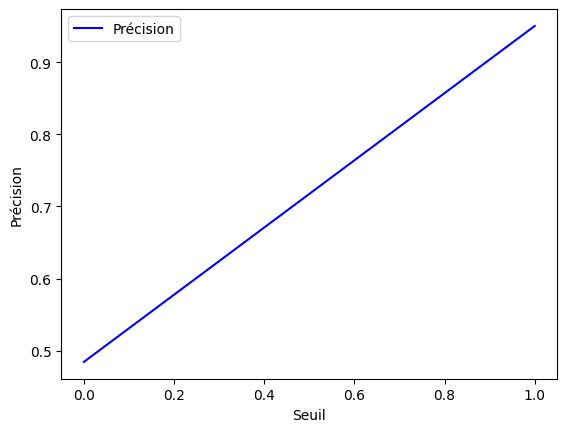

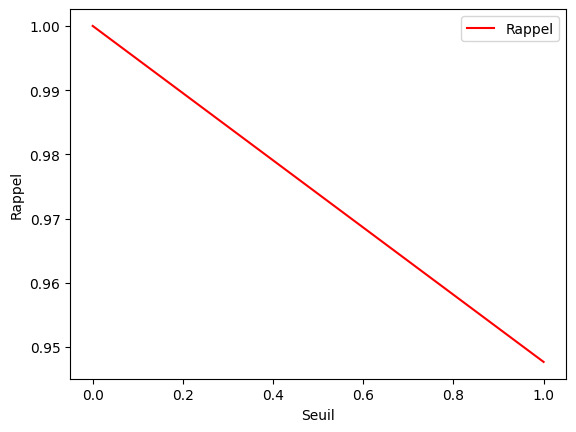

In [59]:
#Question 1.23
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve


# on fait les prédictions sur la base d'apprentissage
y_pred_sgd_recall=sgd_clf.predict(X_train)
precision, recall, thresholds = precision_recall_curve(y_train,  y_pred_sgd_recall)

# Tracer le graphique de précision en fonction des seuils
plt.plot(thresholds, precision[:-1], 'b-', label='Précision')
plt.xlabel('Seuil')
plt.ylabel('Précision')
plt.legend(loc='best')
plt.show()

# Tracer le graphique de rappel en fonction des seuils
plt.plot(thresholds, recall[:-1], 'r-', label='Rappel')
plt.xlabel('Seuil')
plt.ylabel('Rappel')
plt.legend(loc='best')
plt.show()




In [60]:
# Question 1.24

Text(0, 0.5, 'fpr')

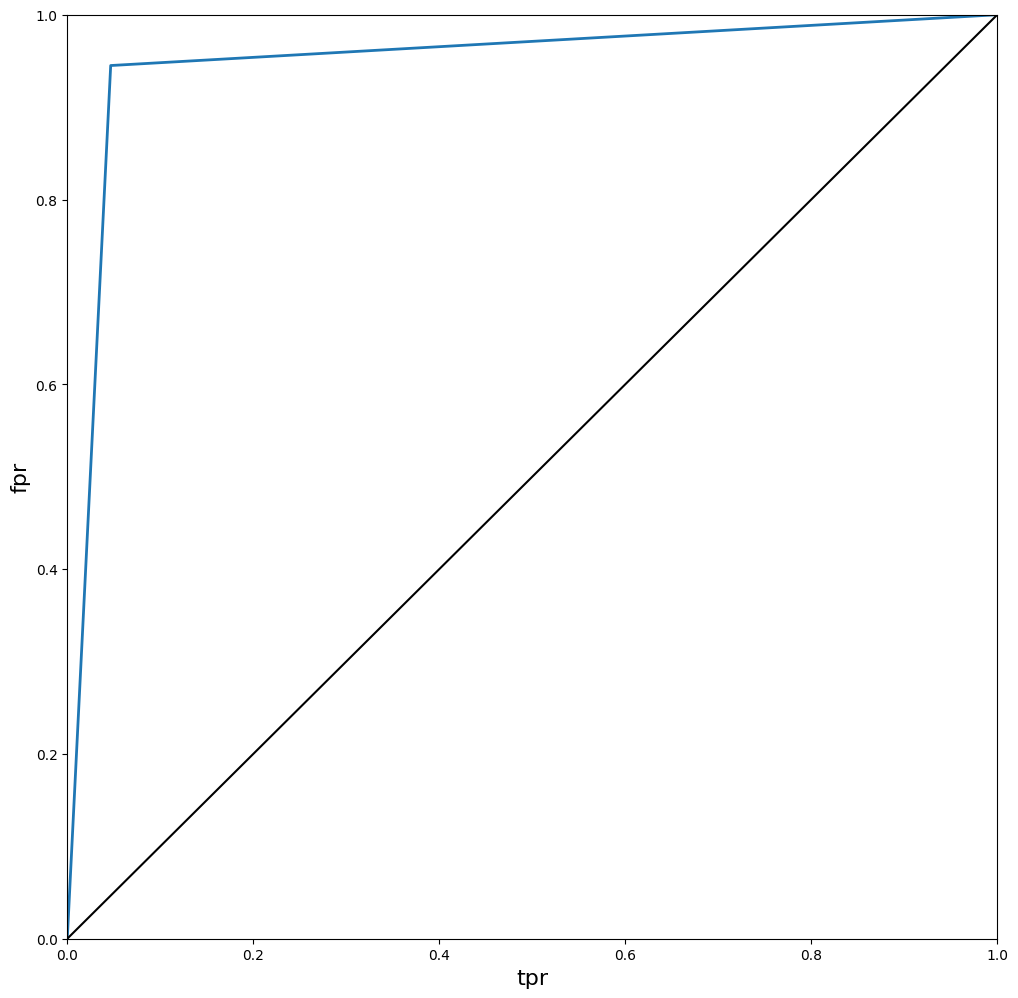

In [61]:
# question 1.25


from  sklearn.metrics  import  roc_curve
fpr,tpr,thresholds = roc_curve(y_train,Y_train_predict)
plt.figure(figsize=(12, 12))
plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,1],[0,1],'k-')
plt.axis([0,1,0,1])
plt.xlabel('tpr',fontsize=16)
plt.ylabel('fpr' ,fontsize=16)

<div class="alert alert-block alert-info" style='color:midnightblue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '> 
    <hr><h2>2.	Partie regression </h2><hr>    
    <ol> 
   
Pour cette partie, on vous demande d’utiliser des données synthétiques générées à partir des lignes de code suivantes : 
        
<CODE> 
import numpy as np
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(200, 1), axis=0)
y = np.sin(X).ravel()
y[::1] += 0.2 * (0.5 - rng.rand(200))
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
</CODE> <br>
</ol> 
</div>

In [75]:
#Insérez votre code ici
import numpy as np
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(200, 1), axis=0)
y = np.sin(X).ravel()
y[::1] += 0.2 * (0.5 - rng.rand(200))
X_test_tree = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]


<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
        <B> Méthode 1 </B><br>
    <br>
2.1 Construire un modèle d’arbre de régression de profondeur 3 pour ces données.<br><br>  
2.2 Entrainer le modèle construit sur la base X, y.<br><br>
2.3 Faites la prédiction sur la base de test pour produire y_predicted<br><br>
2.4 Affichez les données X, y en forme de nuage de points. Affichez le graphe de prédiction
sur le même graphe en rouge.<br>

</div>

In [69]:
#Insérez votre code ici
from sklearn.tree import DecisionTreeRegressor
clf_tree= DecisionTreeRegressor(max_depth=3, random_state=42)
clf_tree.fit(X, y)
y_predicted = clf_tree.predict(X_test_tree)


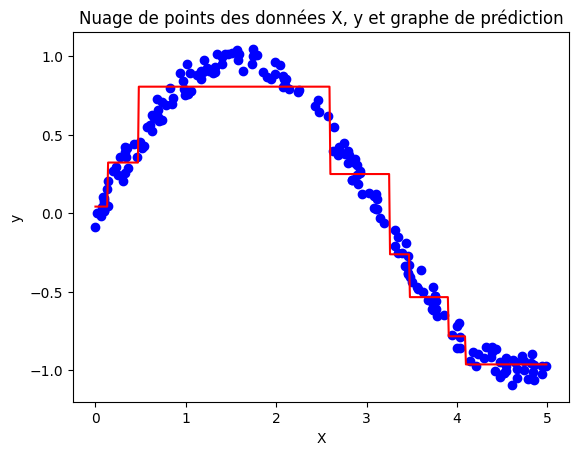

In [70]:
# Question 2.4

import matplotlib.pyplot as plt

# Afficher les données X, y en forme de nuage de points
plt.scatter(X, y, color='blue')

# Afficher le graphe de prédiction en rouge
plt.plot(X_test_tree, y_predicted, color='red')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Nuage de points des données X, y et graphe de prédiction')
plt.show()


<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
            <B> Méthode 2 </B><br>
    <br>
2.5 Créez un modèle de régression polynomiale implémenté dans scikit-learn. Expliquez
comment se fait l’implémentation.<br><br>
2.6 Appliquez ce modèle aux données pour l’entrainer sur X, Y.<br><br>
2.7 Faites la prédiction sur X pour produire y_pred_poly.<br><br>
2.8 Affichez sur le graphe des données en affichant les données en forme de nuages de points
et l’allure du modèle en rouge.<br><br>
2.9 Affichez les scores RMSE et R2 entre y_pred_poly et Y.<br><br>
    </div>

In [78]:
# On importe la régression linéaire et les feature pol
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
                <B> Méthode 3 </B><br>
    <br>
2.10 Appliquez l’algo KNN en choisissant K=2 et en entrainant le modèle sur les données X et
y.<br><br>
2.11 Faites la prédiction sur X pour produire y_predknn.<br><br>
2.12 Visualisez ces données en les affichant sous forme de nuage de points. Tracez la courbe
prédictive des données en rouge.<br><br>
2.13 Affichez les scores RMSE et R2 entre y_predknn et y.<br>
    </div>


In [65]:
#Insérez votre code ici

<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
                <B> Etude comparative </B><br>
    <br>
2.14 Expliquez selon vous quelle méthode est la meilleure pour prédire le salaire du nouvel
employer. Analysez et discutez les résultats obtenus.<br>
        </div>

In [66]:
#Insérez votre réponse ici